<a href="https://colab.research.google.com/github/tcnisaa/metnum_pertemuan11_Tangguh-Chairunnisa/blob/main/metnum_pertemuan11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tangguh Chairunnisa - 21120122140103

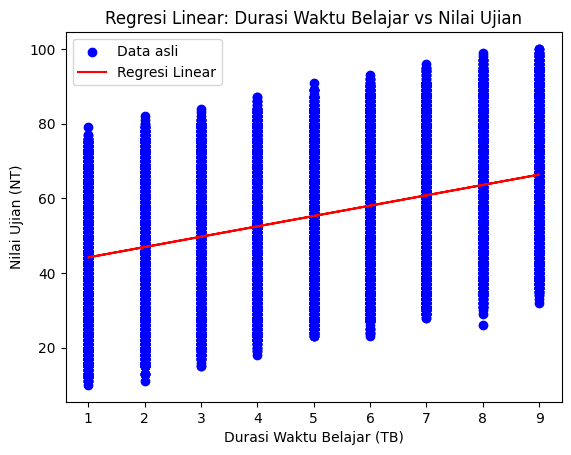

Galat RMS untuk model linear: 17.819474832547773


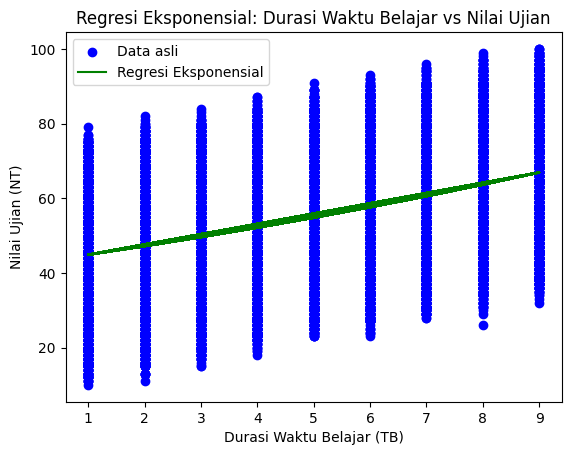

Galat RMS untuk model eksponensial: 17.82862874184698


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Impor data dari file CSV
file_path = 'Student_Performance.csv'  # ganti dengan path file CSV Anda
data = pd.read_csv(file_path)

# Asumsikan file CSV memiliki kolom 'Hours Studied' dan 'Performance Index'
TB = data['Hours Studied'].values.reshape(-1, 1)
NT = data['Performance Index'].values

# Model Linear
linear_model = LinearRegression()
linear_model.fit(TB, NT)

# Prediksi
NT_pred_linear = linear_model.predict(TB)

# Menghitung galat RMS
rms_linear = np.sqrt(mean_squared_error(NT, NT_pred_linear))

# Plot hasil regresi linear
plt.scatter(TB, NT, color='blue', label='Data asli')
plt.plot(TB, NT_pred_linear, color='red', label='Regresi Linear')
plt.xlabel('Durasi Waktu Belajar (TB)')
plt.ylabel('Nilai Ujian (NT)')
plt.legend()
plt.title('Regresi Linear: Durasi Waktu Belajar vs Nilai Ujian')
plt.show()

print(f'Galat RMS untuk model linear: {rms_linear}')

from scipy.optimize import curve_fit

# Definisikan model eksponensial
def exponential_model(TB, a, b):
    return a * np.exp(b * TB)

# Pencocokan kurva untuk model eksponensial
params, _ = curve_fit(exponential_model, TB.ravel(), NT)
a, b = params

# Prediksi
NT_pred_exponential = exponential_model(TB, a, b)

# Menghitung galat RMS
rms_exponential = np.sqrt(mean_squared_error(NT, NT_pred_exponential))

# Plot hasil regresi eksponensial
plt.scatter(TB, NT, color='blue', label='Data asli')
plt.plot(TB, NT_pred_exponential, color='green', label='Regresi Eksponensial')
plt.xlabel('Durasi Waktu Belajar (TB)')
plt.ylabel('Nilai Ujian (NT)')
plt.legend()
plt.title('Regresi Eksponensial: Durasi Waktu Belajar vs Nilai Ujian')
plt.show()

print(f'Galat RMS untuk model eksponensial: {rms_exponential}')